<a href="https://colab.research.google.com/github/acs109108/CNN-Assignment-2025/blob/main/ACS109108_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


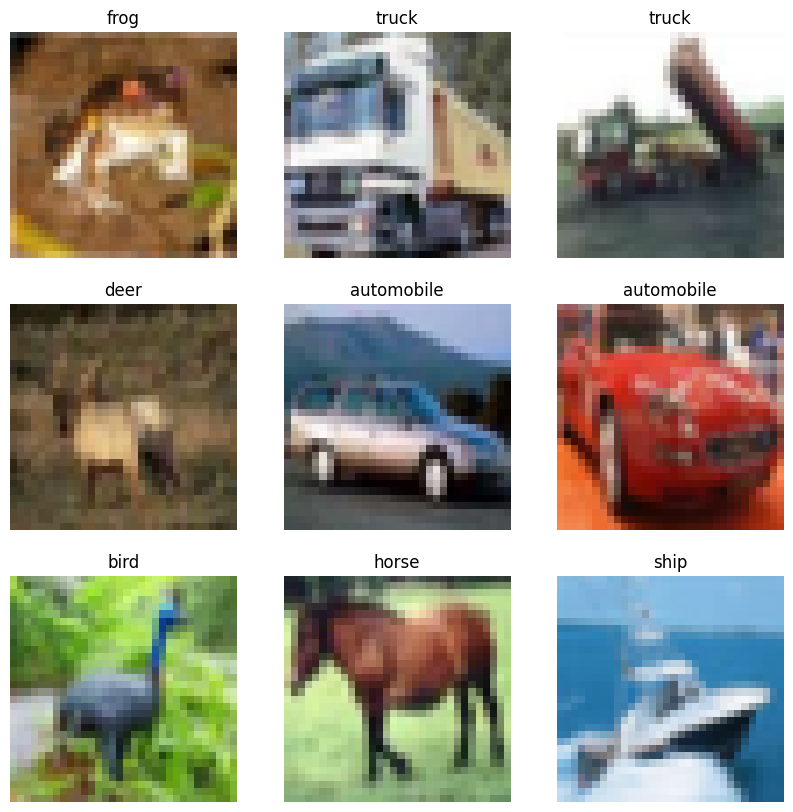

In [4]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [5]:
# Task 1: Enhanced Model Architecture (Adapted to Sequential)
model = models.Sequential([
    layers.Conv2D(96, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.Activation('relu'),
    layers.Dropout(0.2),
    layers.Conv2D(96, (3, 3), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(96, (3, 3), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    layers.Dropout(0.5),

    layers.Conv2D(192, (3, 3), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(192, (3, 3), padding='valid'),
    layers.Activation('relu'),
    layers.Conv2D(192, (3, 3), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    layers.Dropout(0.5),

    layers.Conv2D(192, (3, 3), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(192, (1, 1), padding='valid'),
    layers.Activation('relu'),
    layers.Conv2D(10, (1, 1), padding='valid'),

    layers.GlobalAveragePooling2D(),
    layers.Activation('softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 15, 15, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 192)      │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 10)       │         1,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,369,738 (5.23 MB)

 Trainable params: 1,369,738 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Task 2: Compile the Model
total_epochs = 200
learning_rate = 0.01
batch_size = 64
weight_decay = learning_rate / total_epochs  # 0.00005

optim = SGD(learning_rate=learning_rate,
            decay=weight_decay,
            momentum=0.9,
            nesterov=True)

model.compile(optimizer=optim,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [7]:
# Task 3: Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)


In [8]:
# Task 4: Train the Model with Augmented Data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=200,
                    validation_data=(test_images, test_labels))

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.1519 - loss: 2.2076 - val_accuracy: 0.3425 - val_loss: 1.7575
Epoch 2/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.3540 - loss: 1.7172 - val_accuracy: 0.4721 - val_loss: 1.4334
Epoch 3/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.4698 - loss: 1.4515 - val_accuracy: 0.5525 - val_loss: 1.2377
Epoch 4/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.5418 - loss: 1.2598 - val_accuracy: 0.5958 - val_loss: 1.1711
Epoch 5/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.6017 - loss: 1.1100 - val_accuracy: 0.6360 - val_loss: 1.0411
Epoch 6/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6470 - loss: 0.9923 - val_accuracy: 0.6911 - val_loss: 0.8803
Epoch 7/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6767 - loss: 0.9090 - val_accuracy: 0.7212 - val_loss: 0.8129
Epoch 8/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.7042 - loss: 0.8315 - val_

In [9]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.9035 - loss: 0.3910

Test accuracy: 0.9035


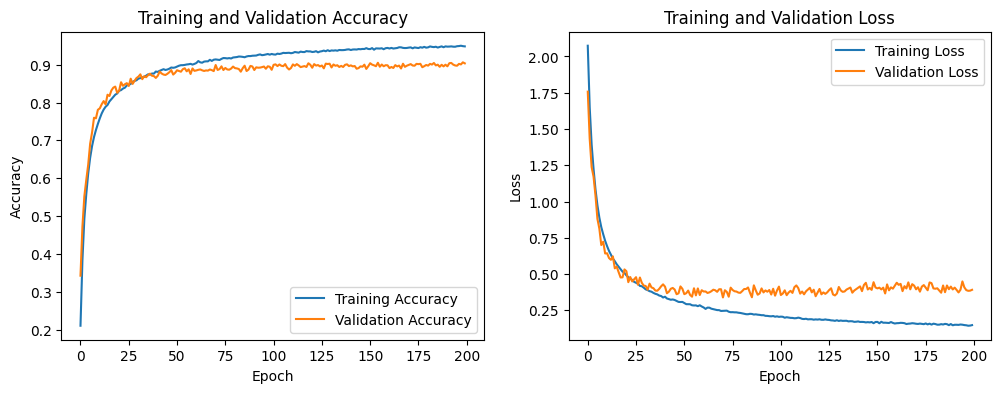

In [10]:
# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [11]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: ship, True: ship
Image 3: Predicted: ship, True: ship
Image 4: Predicted: airplane, True: airplane
Image 5: Predicted: frog, True: frog


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


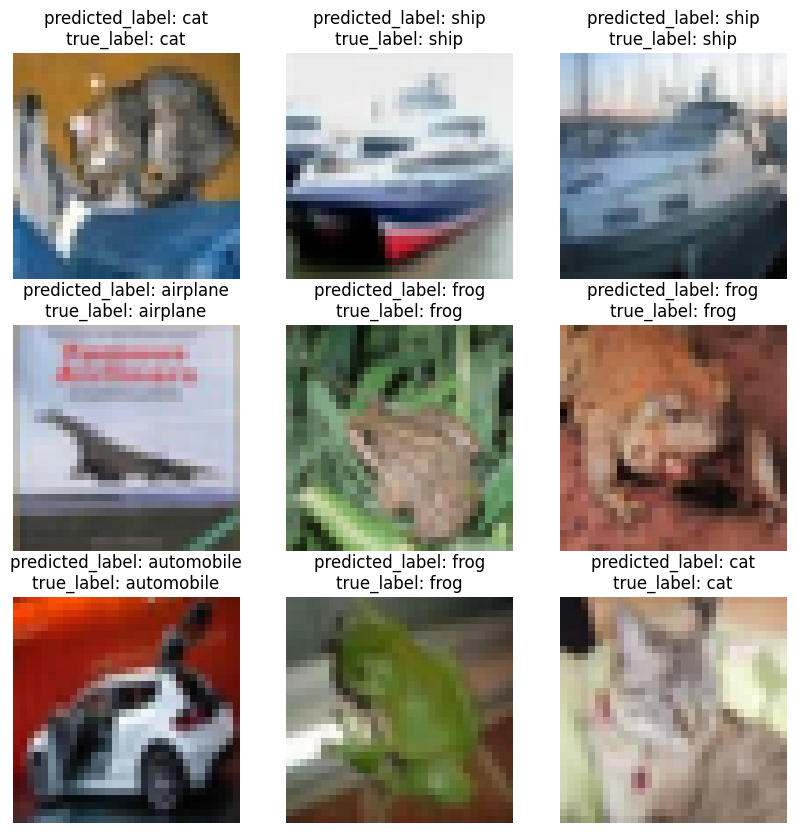

In [12]:
# Visualize prediction results
predictions = model.predict(test_images[:9])
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    plt.title(f'predicted_label: {class_names[predicted_label]}\ntrue_label: {class_names[true_label]}')
    plt.axis('off')
plt.show()

In [13]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.9035
Test Loss: 0.3910
Final Training Accuracy: 0.9483
Final Validation Accuracy: 0.9035
Final Training Loss: 0.1474
Final Validation Loss: 0.3910
Training Epochs: 200
Model Parameters: 1369738


## Task 5: Conclusion

本次 CNN 實驗使用 CIFAR-10 資料集進行影像分類任務，採用一個具備深層卷積結構的神經網路模型進行訓練。該模型結構靈感來自 AlexNet 與 YGNet 架構，透過堆疊多層 `Conv2D`、`Dropout` 與 `GlobalAveragePooling2D`，展現出良好的特徵擷取與分類能力，適合應用於中小型圖像分類任務。

模型架構特色包括：
- 採用多層 3x3 與 1x1 卷積核以強化局部特徵學習與參數效率；
- 在卷積區塊中加入 Dropout（0.2 與 0.5），減少過擬合風險；
- 使用 Global Average Pooling 替代傳統全連接層，以簡化模型並提升泛化能力；
- 最終輸出經由 softmax 進行 10 類別機率分佈預測，對應 CIFAR-10 的分類任務。

訓練階段透過 `ImageDataGenerator` 進行資料增強，包括隨機旋轉、平移與水平翻轉等操作，增加模型對不同圖像變異的適應能力。優化器選用 SGD 並搭配 momentum，有效提升訓練穩定性與收斂速度。

### 實驗結果分析：
模型在測試集上表現如下：
- **Test accuracy:** 90.35%
- **Test loss:** 0.3910

模型在訓練與驗證階段皆展現出穩定的收斂特性，並在測試集上達到 90% 以上的分類準確率，顯示出良好的學習與泛化能力。

### 未來改進方向：
- 引入 Batch Normalization 可進一步穩定與加速訓練；
- 使用 Learning Rate Scheduler 動態調整學習速率，提升最終表現；
- 可與其他深度架構（如 ResNet、MobileNet）進行性能比較，尋求更佳的效率與準確率。

整體而言，實驗結果驗證了深層 CNN 架構結合資料擴增與適當訓練策略，對影像分類任務具有顯著的效能表現。

